### import packages

In [ ]:
# needed for code before package 
from google.colab import drive # specific for colab
import glob
import h5py

# needed for package 
from scipy.ndimage import gaussian_laplace
import numpy as np 
np.seterr(divide='ignore', invalid='ignore') # turn off warning for div by 0 or NaN
import statsmodels.api as sm
lowess = sm.nonparametric.lowess
import warnings
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm # this is ideal for jupyter and colab notebooks might change for others
# from tqdm import tqdm
# from functools import partial # specific for colab -- to make it work better
# tqdm = partial(tqdm, position=0, leave=True)# specific for colab -- to make it work better

### color class


In [ ]:
#$include
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

### group_consecutives 

In [ ]:
# taken directly from online 
def group_consecutives(vals, step=1):
    """Return list of consecutive lists of numbers from vals (number list)."""
    run = []
    run_ind = []
    result = run
    result_ind = run_ind
    expect = None
    for k, v in enumerate(vals):
        if (v == expect):
            if not(np.isnan(v)):
              # print(v)
              # print(expect)
              run.append(v)
              run_ind.append(k)
        else:
            if not(np.isnan(v)):
              
              run = [v]
              run_ind = [k]
              result.append(run)
              result_ind.append(run_ind)
        expect = v + step
    # print(result)
    if result == []:
      pass
    elif result[0]==[]:
      print('asdfasdfasdfasdfasdfasdfasdfasd')
      result = result[1:]
      result_ind = result_ind[1:]
    return result, result_ind
chunks, chunk_inds = group_consecutives(np.asarray([1, 2, 3, 7, 8, 9, 100, 102, 103, 104]), step=1)    
chunks, chunk_inds = group_consecutives(np.asarray([1, 2, 3, 7, 8, 9, 100, 102, 103, 104]), step=1)    

print(chunks)
print(chunk_inds)
chunks[0]

[[1, 2, 3], [7, 8, 9], [100], [102, 103, 104]]
[[0, 1, 2], [3, 4, 5], [6], [7, 8, 9]]


[1, 2, 3]

# MAIN CODE 

In [ ]:
# Mount google drive and set up directories 
drive.mount('/content/gdrive')
base_dir = "/content/gdrive/My Drive/Colab data/H5_full_sessions/"
H5_file_list = glob.glob(base_dir + "*.h5")
H5_file_list

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


['/content/gdrive/My Drive/Colab data/H5_full_sessions/AH0669_170324.h5',
 '/content/gdrive/My Drive/Colab data/H5_full_sessions/AH0762_171013.h5',
 '/content/gdrive/My Drive/Colab data/H5_full_sessions/AH0761_171106.h5',
 '/content/gdrive/My Drive/Colab data/H5_full_sessions/AH1118X25032020ses330-.h5']

In [ ]:
# CHOOSE TEST SET H5 FILE --ONLY ONE--
H5_file_list = [H5_file_list[2]]
if len(H5_file_list)!=1:
  print('For this program this must be only 1 file long')
  raise
H5_file_list

['/content/gdrive/My Drive/Colab data/H5_full_sessions/AH0761_171106.h5']

In [ ]:
#  num in each for H5 files 
num_frames_in_all_H5_files = []
for H5_file in H5_file_list:
    H5 = h5py.File(H5_file, 'r')
    images = H5['images']
    labels = H5['labels']
    num_frames_in_all_H5_files.append(images.shape[0])
    frames_in_each = H5['trial_nums_and_frame_nums'][1].astype(int)

print('These are the number of frames in each H5 file provided -->' + str(num_frames_in_all_H5_files))
list(H5.keys())

These are the number of frames in each H5 file provided -->[560000]


['file_name_nums', 'images', 'labels', 'trial_nums_and_frame_nums']

In [ ]:
frames_in_each

array([4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000,
       4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000,
       4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000,
       4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000,
       4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000,
       4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000,
       4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000,
       4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000,
       4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000,
       4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000,
       4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000,
       4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000,
       4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000])

In [ ]:
# sometime whern building your H5 files the frames get dropped. here is a check you can use 
# to see if any video files are not 3000 or 4000 frames, this will not work for 
# videos that dont have 3000 or 4000 frames. a check can be make becasue the H5
# contains info on number of frames expected per video file-- FIX LATER
not4000 = np.where(np.remainder(num_frames_in_all_H5_files, 4000)!=0)
not3000 = np.where(np.remainder(num_frames_in_all_H5_files, 3000)!=0)
of3000 = np.where(np.in1d(not3000, not4000)==True)
bad_H5s = not3000[0][of3000]
# if this prints out files you need to delete these file and run the entire thing again

print([num_frames_in_all_H5_files[k] for k in bad_H5s])
print([H5_file_list[k] for k in bad_H5s])


[]
[]


# Pole up calculator

- !using iterations of 10 each find max variability and then iterate again until some sort of loss 
- !once min improvments chose that sigma and present the user with the trace to confirm 
- if user says no, then suggest another set of videos frames, or manually adjust 
- must have optional user set sigma values so that they can test and overide the automatic calculator
- then fit with lowess smoothing -- make this value an option as well, must present the trace and teh smoothed trac to the user to verify, must allow for user to change lowess value WITHOUT redoing the laplacian 
- must also output the index of all the non 1 and non zero values at the end so user can watch pole up times 
- must save to the H5 file
- eventually need to allow presentation of the pole up times from set values (e.g. 0.75 to 0.999999) and then have the system present videos of those periods where the prediction of touch is greter than 0.5, there by giving the user the ability to chose when there is a contact and define the time when the pole can be touched. 

In [ ]:
class pole_info():
  def __init__(self):
    pass
  def optimize_sigma(self, img_in, iter_count = 10, sigma_limits = [0.0001, 10], max_iters = 20, difference_stopper = 0.000001, lowess_fraction = 1/10):
    """
    #### img_in input 
      image tensor for testing/setting sigma value, can be many images should include at lease one full pole position change (up to down or down to up )
    #### iter_count = 10
      within each iteration of "max_iters" how many sigma values to test. Too small/large and it wont converge, 10 seems ok with sigma limits of 0.0001 to 10 
    #### sigma_limits = [0.0001, 10]  
      sigma search limits 
    #### max_iters = 20
      maximum number or iterations of iter_count until we stop looping 
    #### difference_stopper = 0.000001
      Once there is no more improvments greater than this value, we break the loop
    #### lowess_fraction = 1/10
      A very important varible. Due to the way we optamize the sigma variable for the gaussian laplace (taking the gaussian laplace for each image then taking variance of that trace).
      variance due to fast noise adds variance that we dont want and this can be a big problme for a subset of trials. This takes care of that. may need to change (inversely) when FPS of video changes
    """
    Lvar = []
    Lall = []
    max_var = []
    sigma_list = np.linspace(sigma_limits[0],sigma_limits[1], iter_count)
    # tqdm2.tqdm.write('\nCalculating optimal sigma please wait...')
    print('\nCalculating optimal sigma please wait...min of 2 cycles')
    for i in  range(max_iters):
      if i ==1:
        print('\nCalculating optimal sigma please wait...min of 2 cycles')
      for sig in tqdm(sigma_list[i*iter_count:i*iter_count+iter_count]):#tqdm
        with warnings.catch_warnings():# supress runtime errors for just this 
        #line so dont get "RuntimeWarning: Mean of empty slice."
          warnings.simplefilter("ignore", category=RuntimeWarning)
          L = [gaussian_laplace(k, sig).var() for k in img_in]
          L = L - np.min(L)
          L = L/np.max(L)
          lwst = lowess(L, range(len(L)), frac = lowess_fraction)[:, 1]
          lwst = L
        try:
          lwst = lwst-np.min(lwst)
          lwst = lwst/np.max(lwst)
          Lvar.append(lwst.var())
        except: #nans in lwst, trash it
          Lvar.append(np.NaN)
        Lall.append(L)
      max_var.append(np.nanmax(Lvar))
      if i >= 1:
        if np.diff(max_var)[-1]<difference_stopper:
          print('variance increased by '+ str(np.diff(max_var)[-1])+ ', stopping due to threshold, if unsatisified with result increase iter_count variable')
          break
        else:
          print('variance increased by '+ str(np.diff(max_var)[-1])+ ', still calculating optimal sigma value')
      if i == max_iters:
        print('maxed out number of iterations before meeting the difference_stopper value, if not satified with result, increase iter_count to higher value')
      step = np.diff(sigma_list)[0]
      val = sigma_list[np.nanargmax(Lvar)]
      lin_start = val-step
      if lin_start<0: lin_start = 0 # prevent negative values 
      sigma_list = np.concatenate((sigma_list, np.linspace(lin_start, val+step, iter_count))) 
    self.Lvar = Lvar
    self.Lall = Lall
    self.max_var = max_var
    self.sigma_list = sigma_list    
    nan_test = np.sum(np.isnan(P.Lvar))
    if nan_test != 0:
      self.sorted_inds_to_sigmas = np.flip(np.argsort(np.asarray(self.Lvar))[:-nan_test])
    else:
      self.sorted_inds_to_sigmas = np.flip(np.argsort(np.asarray(self.Lvar)))
    self.sorted_sigmas = [sigma_list[k] for k in self.sorted_inds_to_sigmas]
    print('\n\n' + color.BOLD+ 'Please'+color.RED+' visually confirm'+ color.END +color.BOLD+' that there is a clear pole trajectory prediction (not just random noise) before you continue'+color.END+'\n\n')
    self.plot_traces()
    plt.show()
  def plot_traces(self, num2Plot = 1, shift_from_max = 0):
    """
    #### num2Plot = 1
      number of traces to plot, each trace is length of the number of frames input, default is 1
    #### shift_from_max = 0
      POSITIVE integer, 0 (default) is the trace with the greatest variance. 1 is the second greatest etc. in case you want to see traces that 
    #### plot_traces(3, 1) 
      this will plot the 2nd 3rd and 4th best estimates for pole down. 
    """
    a = np.argsort(self.Lvar)
    max_a_ind = np.nanargmax(np.sort(self.Lvar))+1 - shift_from_max
    a = a[max_a_ind-num2Plot:max_a_ind]
    plt.figure(figsize=[7, 7])
    _ = [plt.plot(self.Lall[k], zorder=num2Plot-i, label = ' sigma ->'+str(self.sigma_list[k])+ '\n variance->'+str(self.Lvar[k])) for i, k in enumerate(np.flip(a))]
    plt.legend()
    plt.title('Pole up estimation using variance of gaussian laplace')
    plt.xlabel('Frame number')
    plt.ylabel('Variance of gaussian_laplace (normalized to all images) ')
    # plt.show()
  def plot_sigma_vs_variance(self):
    plt.figure(figsize=[7, 7])
    _ = plt.plot(self.sigma_list, self.Lvar, '.')
    plt.title('Optimized sigma using variance')
    plt.xlabel('Sigma values')
    plt.ylabel('Variance of pole up trace')
    # plt.show()
  def process_poles(self,img_in,  trial_lengths = None, sigma = None):
    """
    #### img_in
      image array of all your pole images 
    #### trial_lengths sigma - using this input is highly recomended so that each trial is normalized from 0 to 1 and not an entire session which can cause issues in theory
      either a single value (assuming all trials are the same length), or an array of numbers where each number represents the number of frames in each trial (length of the total number of trials)
    #### img_in sigma
      sigma value to calculate gaussian_laplace of images. Defaults to optamized sigma value if noting is input
     """
    if isinstance(trial_lengths, int):
      trial_lengths = [trial_lengths] 
    if isinstance(frames_in_each, np.ndarray):
      trial_lengths = list(trial_lengths)
    if sigma == None:
      sigma = self.sorted_sigmas[0]
    if trial_lengths == None:
      trial_lengths = [img_in.shape[0]]
    elif len(trial_lengths) == 1:# if all trials are uniform, make an array length of number of trials 
      trial_lengths = np.repeat(trial_lengths[0], img_in.shape[0]/trial_lengths[0])
    
      
    print('This takes some time please be patient...')
    print('Estimated time (assuming 61x61 images) is ' + str(np.round(0.000665*img_in.shape[0]/60, 2))+' minutes')
    start_inds = []
    end_inds = []
    start = 0
    normalized_poles = np.asarray([])
    for i, kk in enumerate(trial_lengths):
      start_inds.append(start)
      end_inds.append(start+kk)
      L = [gaussian_laplace(k, sigma).var() for k in img_in[start_inds[i]:end_inds[i]]]
      L = L - np.min(L)
      L = L/np.max(L)
      normalized_poles = np.concatenate((L, normalized_poles))
      start = start+kk
    self.normalized_poles = normalized_poles
    self.trial_lengths = trial_lengths
    self.start_inds = start_inds
    self.end_inds = end_inds
  def fit_to_lowess(self, lowess_fraction = 1/200, fit_and_plot_test_trial = False, test_trial_ind = 0):
    alltrials_lowess = []
    ##plot a specific trial with the fit for testing
    if fit_and_plot_test_trial:
      i = test_trial_ind
      kk = self.trial_lengths[i]
      y = self.normalized_poles[self.start_inds[i]:self.end_inds[i]]
      x = range(len(y))
      lwst = lowess(y, x, frac = lowess_fraction)[:, 1]
      lwst = lwst-np.min(lwst)
      lwst = lwst/np.max(lwst)
      alltrials_lowess = [ [] for _ in range(i+1) ]
      alltrials_lowess[i] = lwst
      self.alltrials_lowess = alltrials_lowess
      self.plot_lowess_vs_real(i)
      self.alltrials_lowess = None
      print('''Cleared "alltrials_lowess" for testing. Once done testing run "fit_to_lowess" 
            with "fit_and_plot_test_trial" as "False" to re-calculate all''')
      return
    ###  
    for i, kk in tqdm(enumerate(self.trial_lengths)):#tqdm
        y = self.normalized_poles[self.start_inds[i]:self.end_inds[i]]
        x = range(len(y))
        lwst = lowess(y, x, frac = lowess_fraction)[:, 1]
        lwst = lwst-np.min(lwst)
        lwst = lwst/np.max(lwst)
        alltrials_lowess.append(lwst)
        
    self.alltrials_lowess = alltrials_lowess
  def plot_lowess_vs_real(self, index_number = None):
    if index_number == None:
      index_number = np.random.choice(np.arange(0, len(self.trial_lengths)))
    
    plt.figure(figsize=[7, 7])
    _ = plt.plot(self.normalized_poles[self.start_inds[index_number]:self.end_inds[index_number]], 
                  'c-',label = 'un-smoothed pole up estimation')
    _ = plt.plot(self.alltrials_lowess[index_number], 'k-', label = 'lowess smoothed')
    print('plotting trial ind ' + str(index_number))
    try: # try plot red limit lines 
      end_i = np.diff(np.concatenate((np.asarray([0]), np.cumsum(self.trial_lengths))))[index_number]
      _ = plt.plot([0, end_i], [P.up_lim, P.up_lim], 'r-')
      _ = plt.plot([0, end_i], [P.low_lim, P.low_lim], 'r-')
    except:
        pass
    plt.legend()
    # plt.show()
  def cut_out_segments(self, up_lim = 0.6666, low_lim = 0.3333, min_length_segmnet = 5): 
    self.up_lim = up_lim
    self.low_lim = low_lim
    segs = []
    seg_inds = [] 
    trial_inds = []

    for i, y in tqdm(enumerate(self.alltrials_lowess)):#tqdm
      x = np.linspace(1, len(y), len(y))
      x[y>up_lim] = np.nan
      x[y<low_lim] = np.nan
      g , gi = group_consecutives(x)
      ind = np.where([len(k)>=min_length_segmnet for k in gi])[0]
      gi = [gi[kk] for kk in ind]
      [seg_inds.append(k) for k in gi]
      [segs.append(y[k]) for k in gi]
      [trial_inds.append(i) for k in gi]
    y_lin_fit = []
    y_lin_in_index = []
    fit_params = []
    for (x, y, L) in zip(seg_inds, segs, trial_inds):
      L = self.trial_lengths[L]
      fit_poly = (np.poly1d(np.polyfit(x, y, 1)))

      y_lin_fit.append(fit_poly(np.linspace(1, L, L)))
      tmp_ind = (y_lin_fit[-1]>=0) * (y_lin_fit[-1]<=1)
      y_lin_in_index.append(np.where(tmp_ind)[0])
      fit_params.append(fit_poly.coefficients)


    self.segs_segs = segs
    self.segs_seg_inds = seg_inds
    self.segs_trial_inds = trial_inds
    self.segs_y_lin_fit = y_lin_fit
    self.segs_y_lin_in_index = y_lin_in_index
    self.segs_fit_params = fit_params
    #fit using linear estimates and binarize the pole up and down times
    fit_poles_final = []
    cntr = -1
    for k in np.unique(self.segs_trial_inds):
      fit_poles_final.append(np.round(self.alltrials_lowess[k]))
      for kk in list(np.where([k2 == k for k2 in self.segs_trial_inds])[0]):
        cntr = cntr+1
        fit_poles_final[-1][self.segs_y_lin_in_index[kk]] = self.segs_y_lin_fit[cntr][self.segs_y_lin_in_index[kk]]
    self.fit_poles_final = fit_poles_final
  def plot_final_pole_estimations(self):
    H = np.ceil(len(self.fit_poles_final)/1.5)
    plt.figure(figsize=[7, H])
    for i, k in enumerate(self.fit_poles_final):
      k = k*.8 #make it fit all in one number so y axis represents trial inds
      x = range(len(k))
      plt.plot(x, k+i, 'r-')
      for k2 in np.where(np.logical_and(k != 0 , k != .8)):
        k[k2] = np.nan
      plt.plot(x, k+i, 'k-', linewidth = 1.8)   
    # plt.show()

  # def auto_calc(img_analyze, in_img = img_analyze, ):
  #   self.optimize_sigma(im2analyze)

In [ ]:
%%time
# full session 
P = pole_info()
P.optimize_sigma(images[:frames_in_each[0]])
P.plot_sigma_vs_variance()
P.process_poles(images, trial_lengths=frames_in_each) # trial_lengths=4000 also accepted
P.fit_to_lowess(1/80, fit_and_plot_test_trial = True, test_trial_ind = 12) # user can use this to test the look of the lowess fit for the first trial quickly
P.fit_to_lowess(1/40)
P.cut_out_segments(up_lim=.66, low_lim=.33)
P.plot_lowess_vs_real(0) # user can look at all lowess vs real for each trial
P.plot_final_pole_estimations()



Calculating optimal sigma please wait...min of 2 cycles




Calculating optimal sigma please wait...min of 2 cycles



variance increased by 0.0020489280910989255, still calculating optimal sigma value



variance increased by 0.0, stopping due to threshold, if unsatisified with result increase iter_count variable


Please visually confirm that there is a clear pole trajectory prediction (not just random noise) before you continue




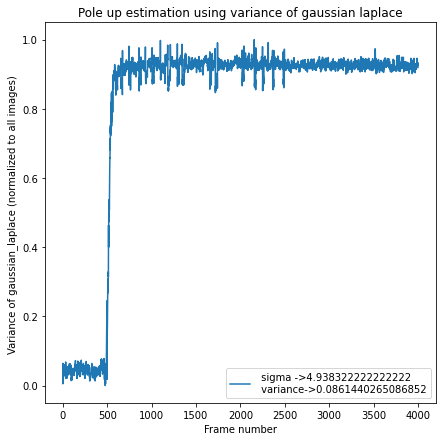

This takes some time please be patient...
Estimated time (assuming 61x61 images) is 0.22 minutes
plotting trial ind 3
Cleared "alltrials_lowess" for testing. Once done testing run "fit_to_lowess" 
            with "fit_and_plot_test_trial" as "False" to re-calculate all



plotting trial ind 0


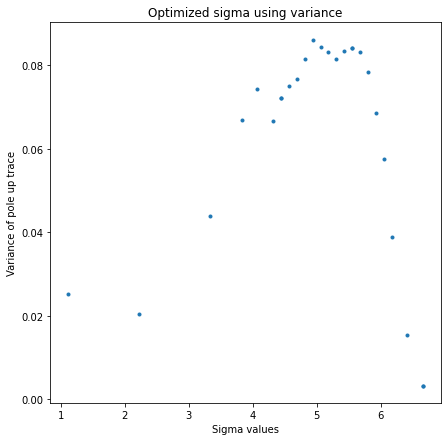

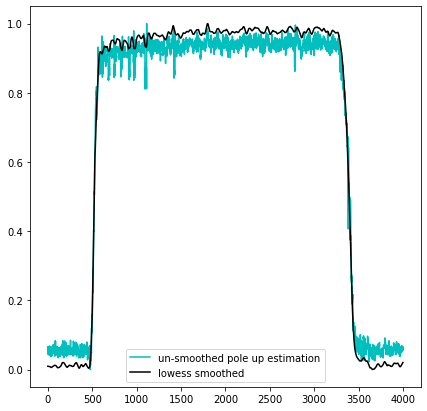

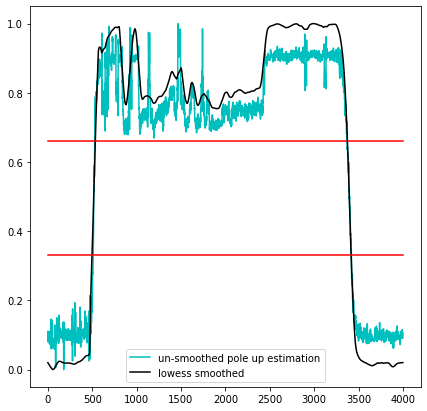

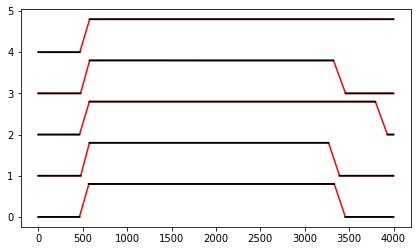

In [ ]:
%%time
# first 5 trials full session 
num_trials = 5
P = pole_info()
P.optimize_sigma(images[:4000])
# P.optimize_sigma(images[400:1000])# has pole up event plus some on border
# P.optimize_sigma(images[473:575])#strictly pole up event 
# P.optimize_sigma(images[2000:2100])%pole is up 
# P.optimize_sigma(images[:100])%pole is down

P.plot_sigma_vs_variance()
P.process_poles(images[:np.sum(frames_in_each[:num_trials])], trial_lengths=frames_in_each[:num_trials]) # trial_lengths=4000 also accepted
P.fit_to_lowess(1/80, fit_and_plot_test_trial = True, test_trial_ind = 3) # user can use this to test the look of the lowess fit for the first trial quickly
P.fit_to_lowess(1/40)
P.cut_out_segments(up_lim=.66, low_lim=.33)
P.plot_lowess_vs_real(0) # user can look at all lowess vs real for each trial
P.plot_final_pole_estimations()


plotting trial ind 1


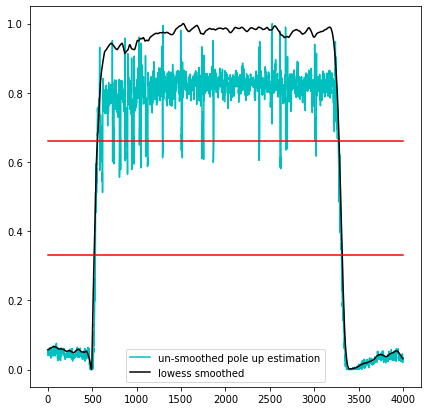

In [ ]:
# plot individual trials raw, lowess fitted, and threshold for pole position change
try:
  P.plot_lowess_vs_real(i) # user can look at all lowess vs real for each trial
  i = i+1
except:
  i = 0
  P.plot_lowess_vs_real(i) # user can look at all lowess vs real for each trial

In [ ]:
#  time per 1 million. this is calculated with 140 trials of 4000 frames each
# this is depndent on the size of the input to optmize sigma value, which is a 
# fixed time cost (doesnt change if there are more frames cause it is only calculated
# once base don the original input array). then the rest is standard time per frame. 
print('num min per millions frames analyzed')
avg_per_frame = (11*60 + 46)/(140*4000)
1000000*avg_per_frame/60

num min per millions frames analyzed


21.011904761904763

In [ ]:
def vidit(img, frame_num_add = 0, wait_time = 0.1):
  plt.figure("tmp")
  for i, k in enumerate(img):
    plt.imshow(k,)
    plt.xlabel(i+frame_num_add)
    plt.show()
    time.sleep(wait_time)
    plt.close()